# Entropías de lenguas de Sudamérica :)

## LANGUAGES 

In [55]:
import pandas as pd 

In [56]:
## classification by macroarea :)
## https://glottolog.org/meta/downloads

macroarea = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [57]:
macroarea.dropna(inplace = True)

In [58]:
macroarea = macroarea[['isocodes','macroarea']]

In [59]:
## dictionary iso_code:macroarea

macroarea = dict(zip(macroarea['isocodes'], macroarea['macroarea']))

In [60]:
## filter by languages of the americas

macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America']}

In [61]:
macroarea

{'axb': 'South America',
 'aca': 'South America',
 'guq': 'South America',
 'acu': 'South America',
 'acs': 'South America',
 'ash': 'South America',
 'avo': 'South America',
 'aga': 'South America',
 'agr': 'South America',
 'tba': 'South America',
 'cpc': 'South America',
 'ake': 'South America',
 'aqz': 'South America',
 'ako': 'South America',
 'apv': 'South America',
 'amc': 'South America',
 'ama': 'South America',
 'amr': 'South America',
 'qva': 'South America',
 'adw': 'South America',
 'aan': 'South America',
 'ana': 'South America',
 'anb': 'South America',
 'ano': 'South America',
 'aqt': 'South America',
 'tnd': 'South America',
 'ans': 'South America',
 'apy': 'South America',
 'api': 'South America',
 'apn': 'South America',
 'apu': 'South America',
 'arl': 'South America',
 'aro': 'South America',
 'arj': 'South America',
 'awt': 'South America',
 'qxu': 'South America',
 'aed': 'South America',
 'arh': 'South America',
 'ark': 'South America',
 'ait': 'South America',


In [62]:
## corpus UDHR https://www.unicode.org/udhr/index.html

languages={}

for language in macroarea.keys():
    #with open('udhr_' + language + '.txt', 'r', encoding='utf-8') as file:
    try: 
        file = open('udhr/'+'udhr_'+language+'.txt', 'r',encoding='utf-8')  
        language_text=file.read().split('\n')
        languages[language]=[line.strip() for line in language_text]
        languages[language]=[line for line in languages[language] if len(line)>0]
    except FileNotFoundError:
        pass

In [63]:
len(languages)

55

In [64]:
## mapudungun :)

languages['zro'][:10]

['Universal Declaration of Human Rights - Záparo',
 '© 1996 – 2009 The Office of the High Commissioner for Human Rights',
 'This plain text version prepared by the “UDHR in Unicode”',
 'project, https://www.unicode.org/udhr.',
 '---',
 '?',
 'KAWIRIAJA KAYAPI RIKUANU 50 APARUA AKASUJUNUKA KUNUMASHIRA KINIANA KAYAPUINA 1948-1998 KUNUMASHIRA KIRAKA RIKUANU KAYAPI',
 'Kiraitia kiniana amimaja jinia, kiniana kiraka niata nuka 10 tuwijia kashikua jiania aparua 1948 aitika aniti atijianuka kunumashira kiraka rikuanu. Kayapuina ta nuka ikicha arishnu nukicha tia nukaka kiniana panichanu akasujunuka ikicha wikaishinu inianu aitika itiama iya tamanu aitikua aiti taikua ikima kiraitia niatajinia rapaka jinia tamanu akasujunuka.',
 'Witsa ikicha panichanu niakawiria jinia kutarajita kawiriaja ku aramaja ikicha kupani majicha.',
 'Panichanu tamasa taykua kayapi kupanimajicha ikicha nuka kiniana amimaja anakijaunuka taikua inianu. Witsaka akasujunuka iya yakawi witsaja ikicha niakawiria nukaka kuak

In [65]:
## entropy 

entropy = pd.read_csv('BlockH_EPC_PBC_UDHR_50K.csv',sep=',')

In [66]:
entropy

,file,iso,num_tokens,H_ML,H_MM,H_Jeff,H_Lap,H_SG,H_minmax,H_CS,H_NSB,H_shrink,corpus
0,bg_tokenized_1mio,bul,50000,9.781680,9.892508,10.115657,10.388494,9.781777,9.803204,10.057565,9.944499,9.790227,EPC
1,cs_tokenized_1mio,ces,50000,10.938515,11.081024,11.258764,11.507686,10.938589,10.955007,11.185492,11.066693,10.958576,EPC
2,da_tokenized_1mio,dan,50000,9.456836,9.550741,9.757233,10.008348,9.456938,9.479399,9.694587,9.606737,9.469545,EPC
3,nl_tokenized_1mio,nld,50000,9.084549,9.164936,9.357162,9.589850,9.084655,9.108197,9.299038,9.223514,9.092268,EPC
4,en_tokenized_1mio,eng,50000,9.006550,9.073534,9.229996,9.424297,9.006653,9.029571,9.176861,9.118318,9.014738,EPC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,hbo-x-bible-westminster.csv,hbo,50000,12.127343,12.344959,12.472281,12.714850,12.127398,12.139638,12.403218,12.221889,12.172960,PBC
1912,esk-x-bible.csv,esk,50000,12.517256,12.809647,12.939824,13.215269,12.517309,12.528965,12.926138,13.546939,12.550563,PBC
1913,ike-x-bible.csv,ike,50000,12.949484,13.261972,13.320453,13.555010,12.949528,12.959268,13.309612,13.798097,13.004339,PBC
1914,kal-x-bible.csv,kal,50000,12.974790,13.289442,13.342556,13.574732,12.974833,12.984431,13.351642,13.812921,13.032471,PBC


In [67]:
entropy = dict(zip(entropy['iso'], entropy['H_NSB']))

In [68]:
entropy_b = {key:entropy[key] for key in entropy.keys() if key in languages.keys()}

In [69]:
len(entropy_b)

53

In [70]:
import numpy as np

np.mean(list(entropy_b.values()))

10.012958617943395

In [71]:
dict(sorted(entropy_b.items(), key=lambda item: item[1]))

{'guu': 6.3224256982,
 'zro': 6.4193206839,
 'prq': 7.4528689216,
 'pap': 7.9200986339,
 'tca': 8.3720181789,
 'hns': 8.4022749403,
 'qxu': 8.4324022285,
 'tob': 8.6032659034,
 'arn': 8.6888169482,
 'ese': 8.7428221271,
 'amc': 8.7601834652,
 'qva': 8.9577436591,
 'gyr': 9.1371650015,
 'cbr': 9.2501773057,
 'auc': 9.4096381699,
 'guc': 9.5536257638,
 'huu': 9.6566287175,
 'gug': 9.7558067099,
 'ura': 9.8146485954,
 'snn': 9.8536991633,
 'shp': 9.9012869207,
 'arl': 9.9070670063,
 'mcd': 10.090376424,
 'kwi': 10.1601046839,
 'sey': 10.1714486679,
 'cof': 10.1758644856,
 'cbs': 10.1988774851,
 'ame': 10.3039811114,
 'mcf': 10.3065430785,
 'not': 10.3745981777,
 'cbt': 10.4189691155,
 'acu': 10.4438376112,
 'cbi': 10.5109020854,
 'yad': 10.6785287226,
 'pbb': 10.7464436316,
 'amr': 10.8902514263,
 'qvc': 10.9092753963,
 'cni': 10.9132714285,
 'jiv': 10.9651237792,
 'boa': 10.991176758,
 'qvm': 11.0027459845,
 'cbu': 11.0441950552,
 'cpu': 11.1588078778,
 'qvh': 11.1774918443,
 'agr': 11.2

## Simple statistics: types, tokens and entropy

In [72]:
def tokenize(s):
    return s.split(' ')

In [73]:
def clean(L):
    language=languages[L]
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    language=[list(filter(None, [w.lower().translate(table) for w in tokenize(sentence)])) for sentence in language if len([w.lower() for w in [w.translate(table) for w in tokenize(sentence)]])>0]
    language=[[w for w in s if w!="''"] for s in language] 
    language=[[w for w in s if w!='̃'] for s in language] 
    language=[[w for w in s if not w.isdigit()] for s in language]
    return language[9:]

In [74]:
clean_languages={}
for language in languages:
    C=clean(language)
    if len(C)>0:
        clean_languages[language]=clean(language)

In [75]:
#for language in clean_languages.keys():
#    print(language, clean_languages[language][0])

In [76]:
from collections import Counter

In [77]:
words_entropy={}
words={}
mean_tokens={}
mean_types={}
for language in clean_languages.keys():
    words_entropy[language]=[item for sublist in clean_languages[language] for item in sublist]
    words[language]=[len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])),Counter([item for sublist in clean_languages[language] for item in sublist])]
    mean_tokens[language]=len([item for sublist in clean_languages[language] for item in sublist])
    mean_types[language]=len(set([item for sublist in clean_languages[language] for item in sublist]))
    print(language,len(clean_languages[language]),len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])))

acu 88 1524 526
agr 86 1576 734
amc 83 1392 638
amr 89 1323 403
qva 88 1622 727
arl 90 1872 507
qxu 90 1080 535
cni 88 1206 481
prq 71 574 236
kwi 198 1273 727
quy 89 1223 624
qug 235 1388 696
boa 92 1502 671
qvc 86 1058 558
qud 87 878 428
cbu 87 1204 545
cot 90 1419 670
hns 90 2196 481
cbr 88 2074 526
cbs 72 574 236
ayr 87 878 582
cbi 96 3025 934
qxa 86 1421 713
quz 90 1053 638
ese 64 703 503
gyr 78 1159 459
qvh 86 1854 817
qwh 87 1260 579
arn 87 1671 383
qvm 88 1286 612
mcf 91 2319 583
huu 87 1211 370
not 87 1046 377
qxn 85 1543 651
qvn 86 1281 657
pbb 86 1390 669
pap 86 1788 462
gug 79 1144 570
cpu 88 2248 828
sey 90 1332 497
mcd 89 865 447
cbt 88 1053 463
shp 92 2417 806
jiv 90 1464 680
snn 189 1440 522
tca 88 1894 375
tob 87 2426 515
cof 91 1148 401
ura 86 1160 365
auc 199 1421 368
guc 89 1156 456
yad 88 1063 575
ame 90 2264 685
guu 86 1984 376
zro 87 1204 255


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

1445.9818181818182


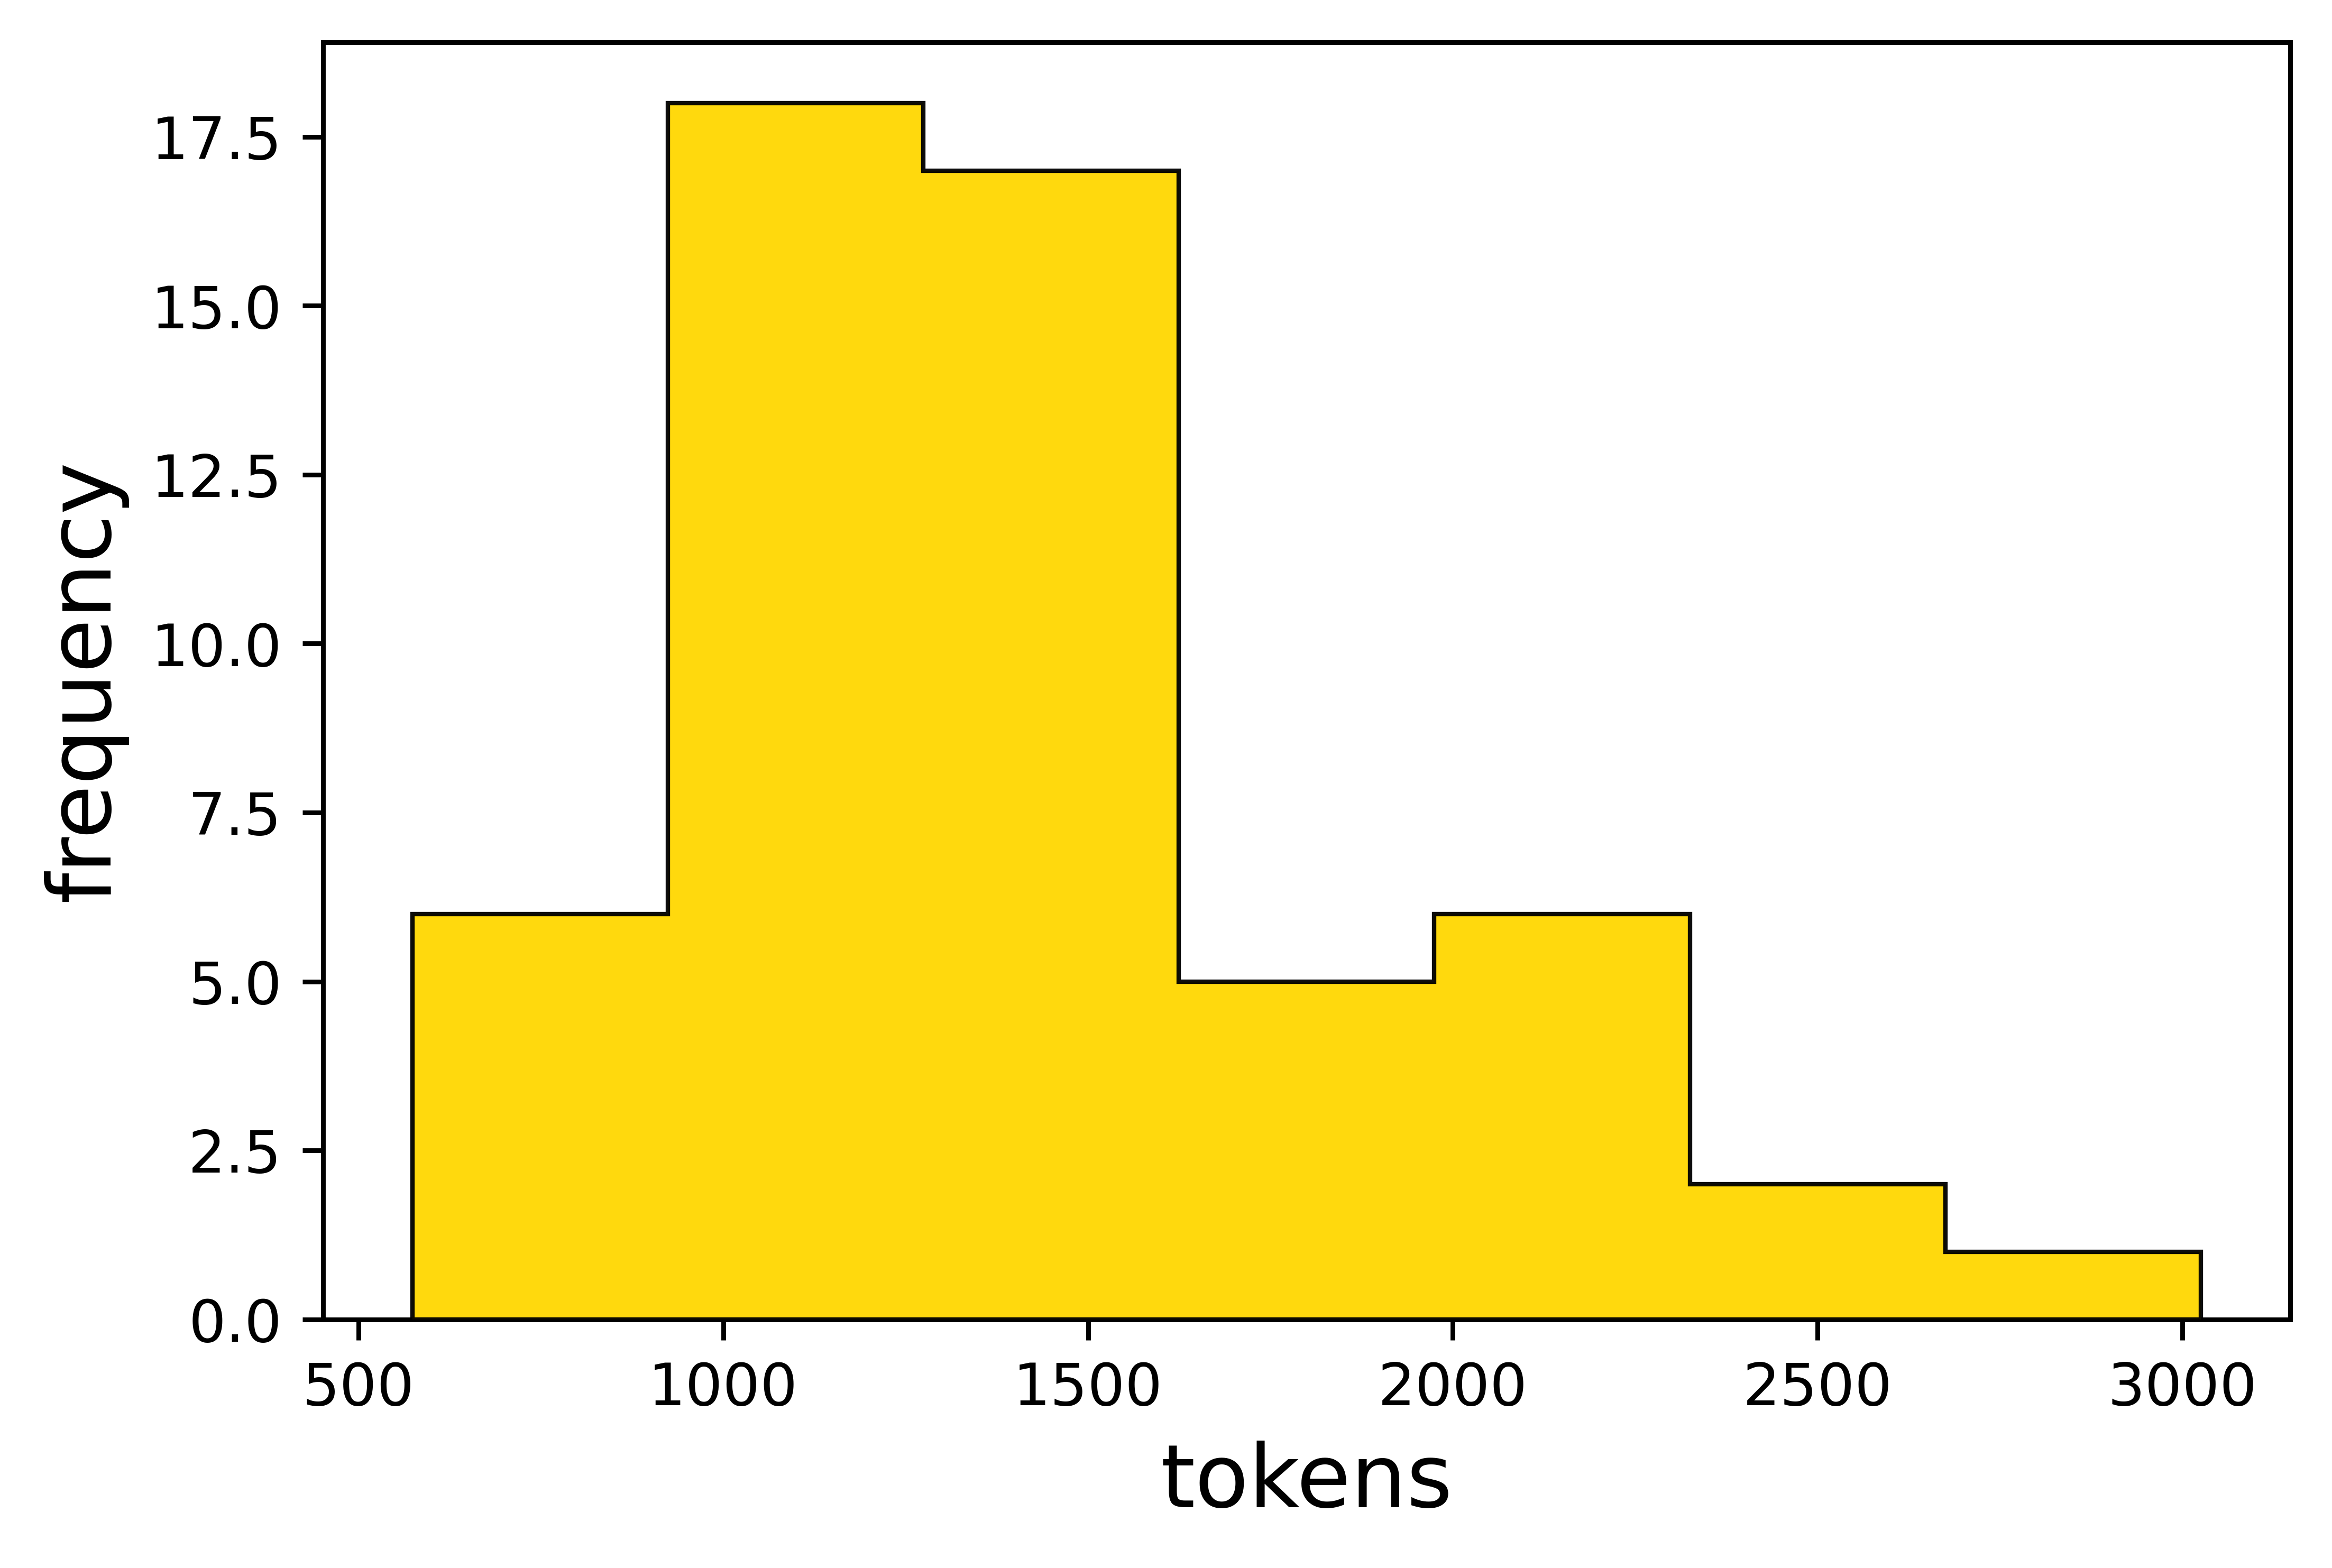

In [79]:
fig, ax = plt.subplots(dpi=800)

H=list(mean_tokens.values())
data = np.array(H)
plt.hist(data, bins='sturges', cumulative=False, linewidth=0.75, color='gold',alpha=0.95,histtype='stepfilled',stacked=False,density=False,
        zorder=5, edgecolor='k')
#H=list(mean_types.values())
#data = np.array(H)
#plt.hist(data, bins='doane', cumulative=False, color='r',alpha=0.75,stacked=False,density=True,
#        zorder=5, edgecolor='k')
#kde = sm.nonparametric.KDEUnivariate(data)
#kde.fit(bw=0.8) # Estimate the densities
#X=np.linspace(500, 3000, num=1000)

#ax.plot(X, [kde.evaluate(x) for x in X], '-', lw=2, color='r', zorder=10)

#plt.legend(loc='upper left',fontsize=12)
#plt.xlim([0., 2])
#plt.ylim([0., 3])
print(np.mean(data))
#plt.axvline(x=np.mean(data),linestyle='--',color='k')
plt.xlabel(r'tokens',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('tokens.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [80]:
from collections import Counter
import math

entropy_dict = {}

def entropy(lista_palabras):
    C = dict(Counter(lista_palabras)).values()
    C = [c/sum(C) for c in C]
    E = 0
    for c in C:
        E+=-c*math.log(c)
    return E

In [81]:
for language in words_entropy.keys():
    L = words_entropy[language]
    entropy_dict[language]=entropy(L)

In [82]:
dict(sorted(entropy_dict.items(), key=lambda item: item[1]))

{'guu': 4.283140185231362,
 'tca': 4.410472197168187,
 'zro': 4.493626621686203,
 'tob': 4.7358115743072,
 'arn': 4.783602245104253,
 'hns': 4.813777682445622,
 'prq': 4.857893320299761,
 'cbs': 4.857893320299761,
 'pap': 4.980161449164703,
 'auc': 5.018904789403446,
 'not': 5.022261537543826,
 'ura': 5.070907415484021,
 'arl': 5.085005142755641,
 'amr': 5.132243153047192,
 'huu': 5.135622751473209,
 'cbr': 5.142722636151011,
 'mcf': 5.210228898067034,
 'cni': 5.255749979642288,
 'guc': 5.297074141722801,
 'cof': 5.341516106289751,
 'gyr': 5.366331088130168,
 'acu': 5.368720027513855,
 'cbt': 5.378385395792329,
 'snn': 5.427862868928345,
 'ame': 5.4535533887833845,
 'sey': 5.478320522823783,
 'qud': 5.501439999405314,
 'amc': 5.597555534562594,
 'mcd': 5.621635043787241,
 'gug': 5.659832287213143,
 'qwh': 5.663444277433931,
 'shp': 5.690510608447274,
 'qxu': 5.6925773424001225,
 'cbu': 5.698569523711966,
 'qxn': 5.711176458530988,
 'cot': 5.755613669949104,
 'cbi': 5.760724320725785,
 

In [83]:
entropy_X = {key:entropy_dict[key] for key in entropy_b.keys()}
entropy_Y = {key:entropy_b[key] for key in entropy_b.keys()}

In [84]:
print(len(entropy_X),len(entropy_Y))

53 53


In [85]:
X = [entropy_X[key] for key in entropy_X.keys()]
Y = [entropy_Y[key] for key in entropy_X.keys()]

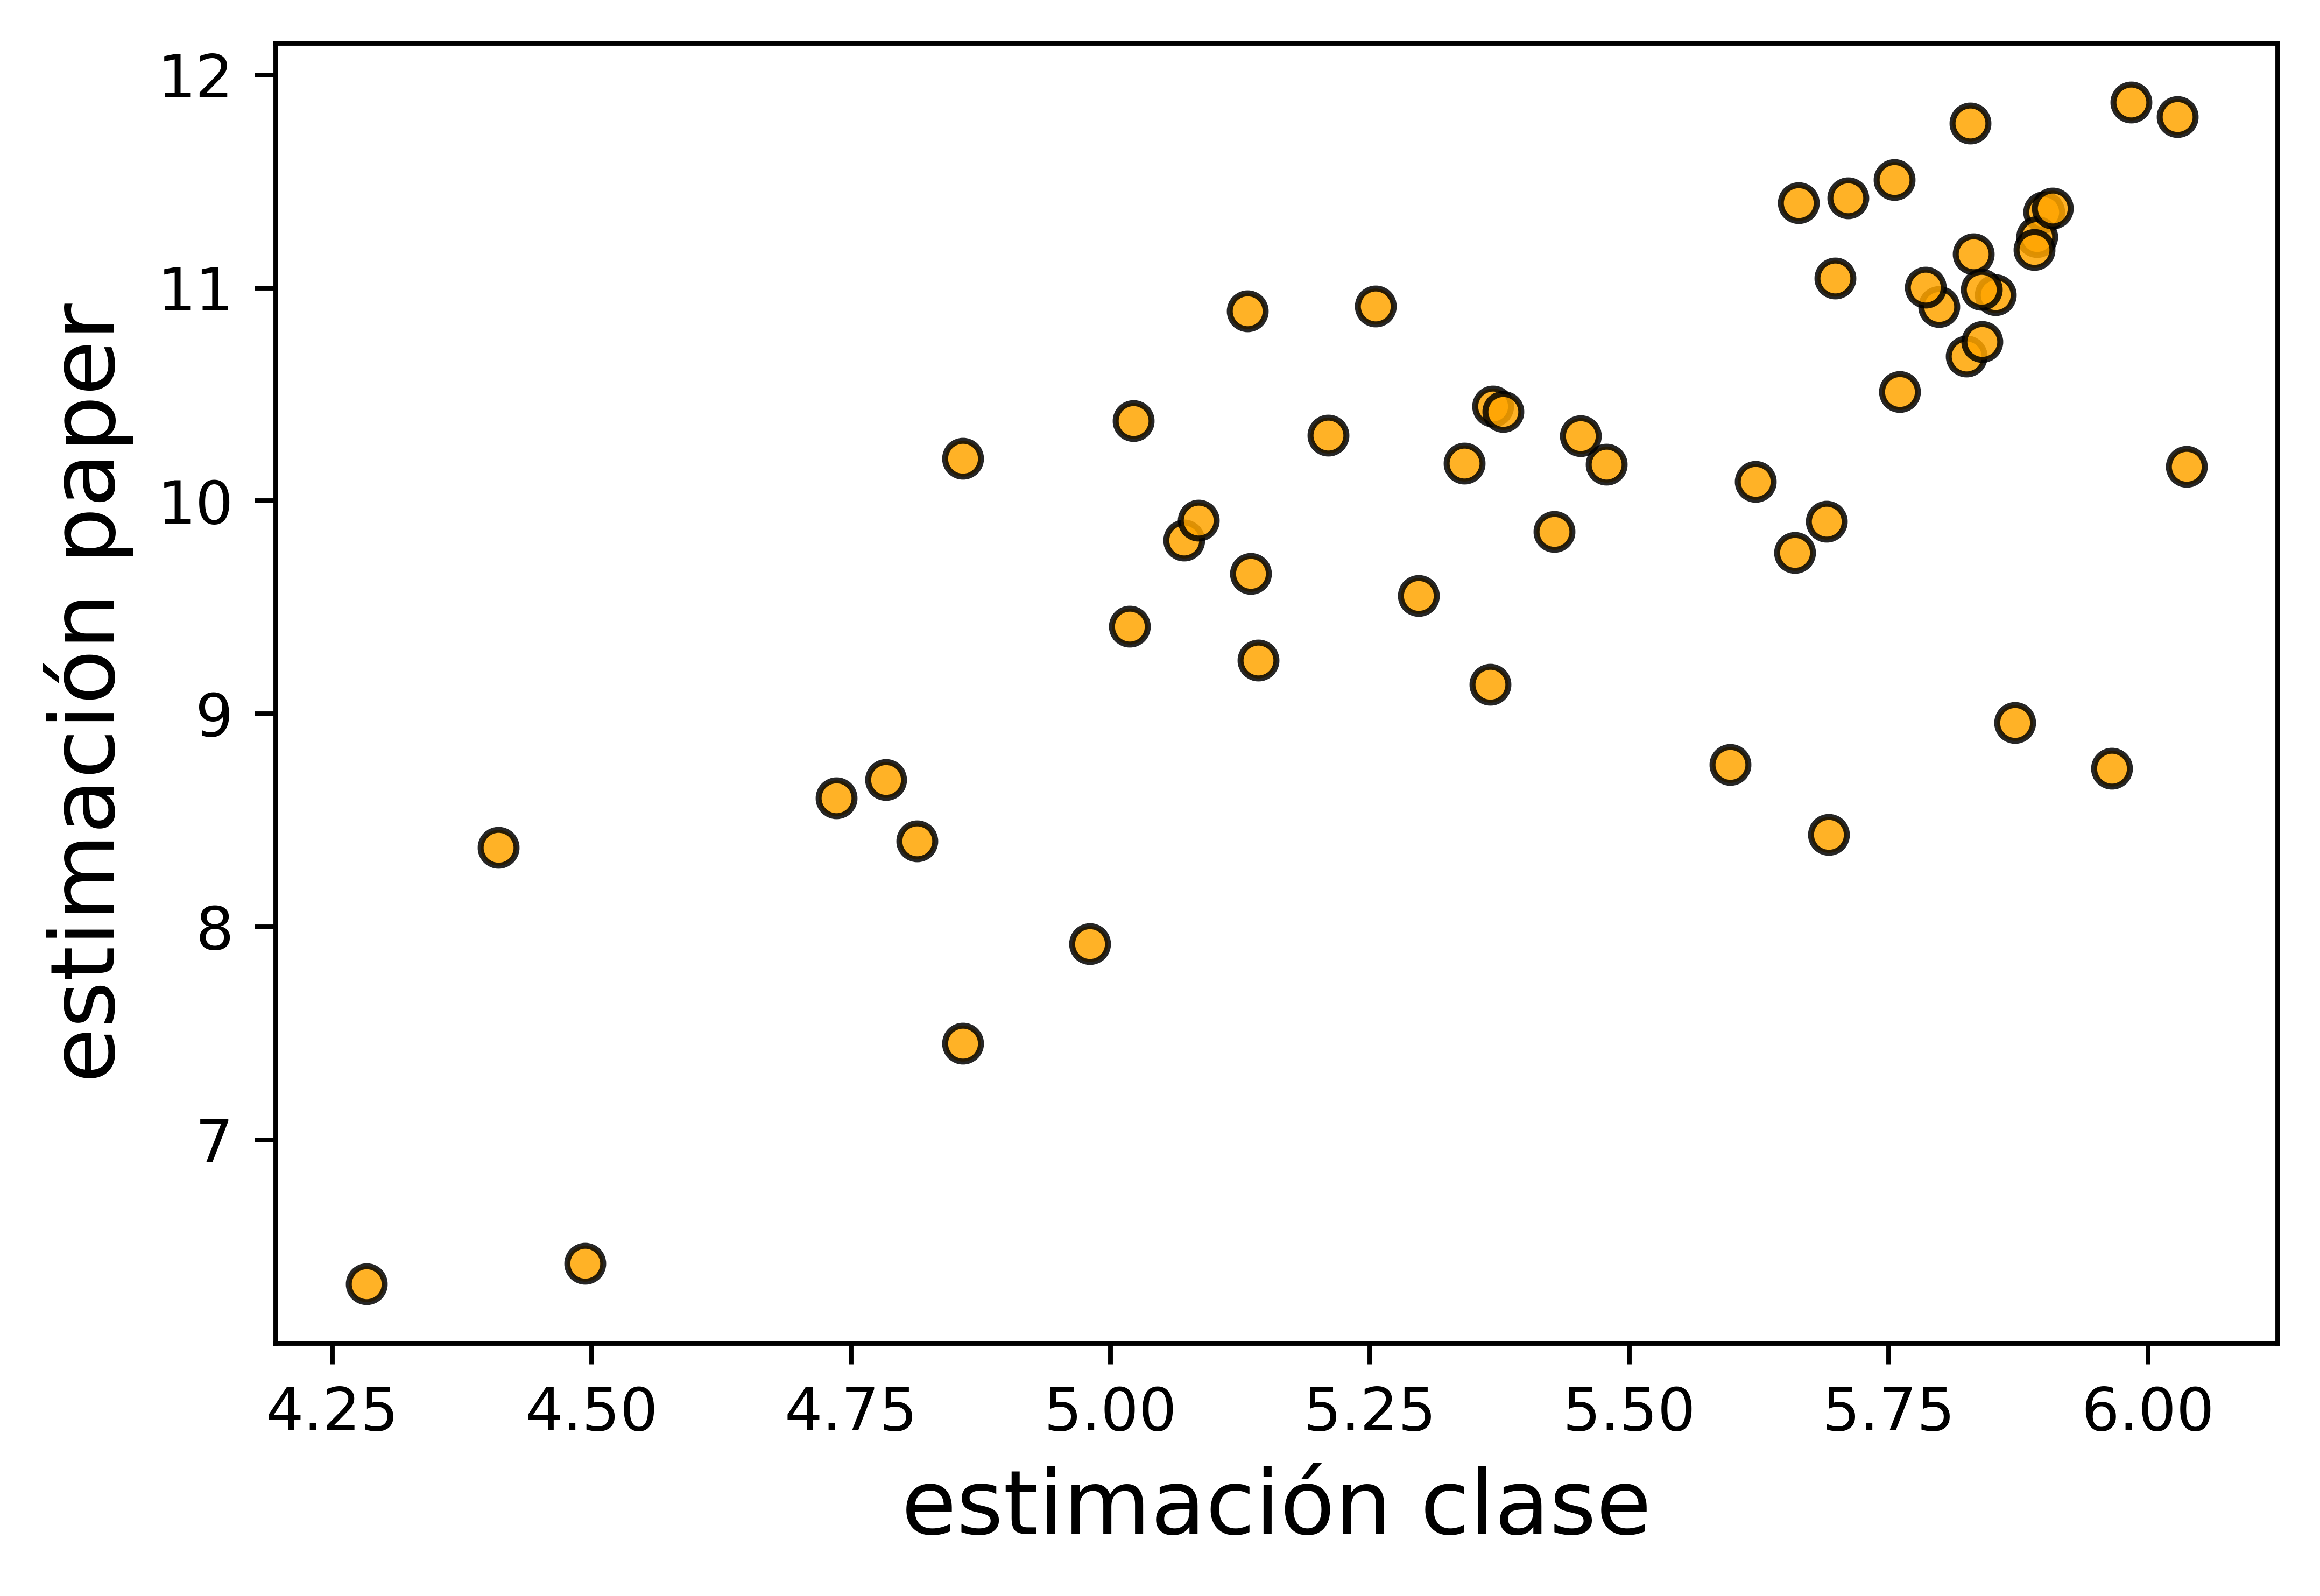

In [86]:
fig, ax = plt.subplots(dpi=800)

ax.plot(X,Y,marker='o',color='orange',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'estimación paper',fontsize=15)
plt.xlabel(r'estimación clase',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('entropies.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [92]:
## miramos languoids

languoid = pd.read_csv('languoid.csv',sep=',')

In [93]:
languoid

,id,family_id,parent_id,name,bookkeeping,level,latitude,longitude,iso639P3code,description,markup_description,child_family_count,child_language_count,child_dialect_count,country_ids
0,3adt1234,afro1255,nort3292,3Ad-Tekles,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1,aala1237,aust1307,ramo1244,Aalawa,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,aant1238,nucl1709,nort2920,Aantantara,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
3,aari1238,sout2845,ahkk1235,Aari-Gayil,False,family,NaN,NaN,aiz,NaN,NaN,0,2,0,NaN
4,aari1239,sout2845,aari1238,Aari,False,language,5.95034,36.5721,aiw,NaN,NaN,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25434,zuti1239,tupi1275,guaj1255,Guajajára of Zutiua,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
25435,zuwa1238,koia1260,omie1241,Zuwadza,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
25436,zwal1238,atla1278,shal1242,Zwall,False,dialect,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
25437,zyph1238,sino1245,nucl1757,Zyphe,False,language,22.52400,93.2640,zyp,NaN,NaN,0,0,2,IN MM


In [94]:
import geopandas

In [95]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [96]:
world = world[(world['continent']=='South America')]

In [97]:
languoid = languoid[languoid['iso639P3code'].isin(list(entropy_X.keys()))]

In [98]:
languoid

,id,family_id,parent_id,name,bookkeeping,level,latitude,longitude,iso639P3code,description,markup_description,child_family_count,child_language_count,child_dialect_count,country_ids
102,achu1248,jiva1245,shua1256,Achuar-Shiwiar,False,language,-2.826460,-77.264100,acu,NaN,NaN,0,0,2,EC PE
244,agua1253,jiva1245,jiva1245,Aguaruna,False,language,-5.300440,-77.921800,agr,NaN,NaN,0,0,0,PE
529,amah1246,pano1259,head1239,Amahuaca,False,language,-10.201200,-72.320800,amc,NaN,NaN,0,0,2,BR PE
549,amar1274,hara1260,hara1260,Amarakaeri,False,language,-12.493100,-70.553300,amr,NaN,NaN,0,0,1,PE
573,ambo1252,quec1387,yaru1256,Ambo-Pasco Quechua,False,language,-10.513800,-76.113500,qva,NaN,NaN,0,0,0,PE
869,arab1268,zapa1251,arab1396,Arabela,False,language,-1.961260,-75.061200,arl,NaN,NaN,0,0,0,PE
957,areq1237,quec1387,ayac1238,Arequipa-La Unión Quechua,False,language,-15.180600,-72.633300,qxu,NaN,NaN,0,0,4,PE
1058,asha1243,araw1281,asha1242,Asháninka,False,language,-11.931100,-73.907300,cni,NaN,NaN,0,0,0,PE
1063,ashe1272,araw1281,ashe1271,Ashéninka Perené,False,language,-10.977700,-74.915300,prq,NaN,NaN,0,0,0,PE
1260,awac1239,barb1265,unun9945,Awa-Cuaiquer,False,language,1.216520,-78.340100,kwi,NaN,NaN,0,0,0,CO EC


In [99]:
x, y, codes = languoid['longitude'].values, languoid['latitude'].values, languoid['iso639P3code'].values

In [100]:
len(x)

53

In [101]:
X=[]
Y=[]
CODES=[]

In [102]:
for i in range(len(x)):
    X+=[x[i]]
    Y+=[y[i]]
    CODES+=[codes[i]]

In [103]:
c = [entropy_X[code] for code in CODES]

In [104]:
print(min(c),max(c))

4.283140185231362 6.037148344175885


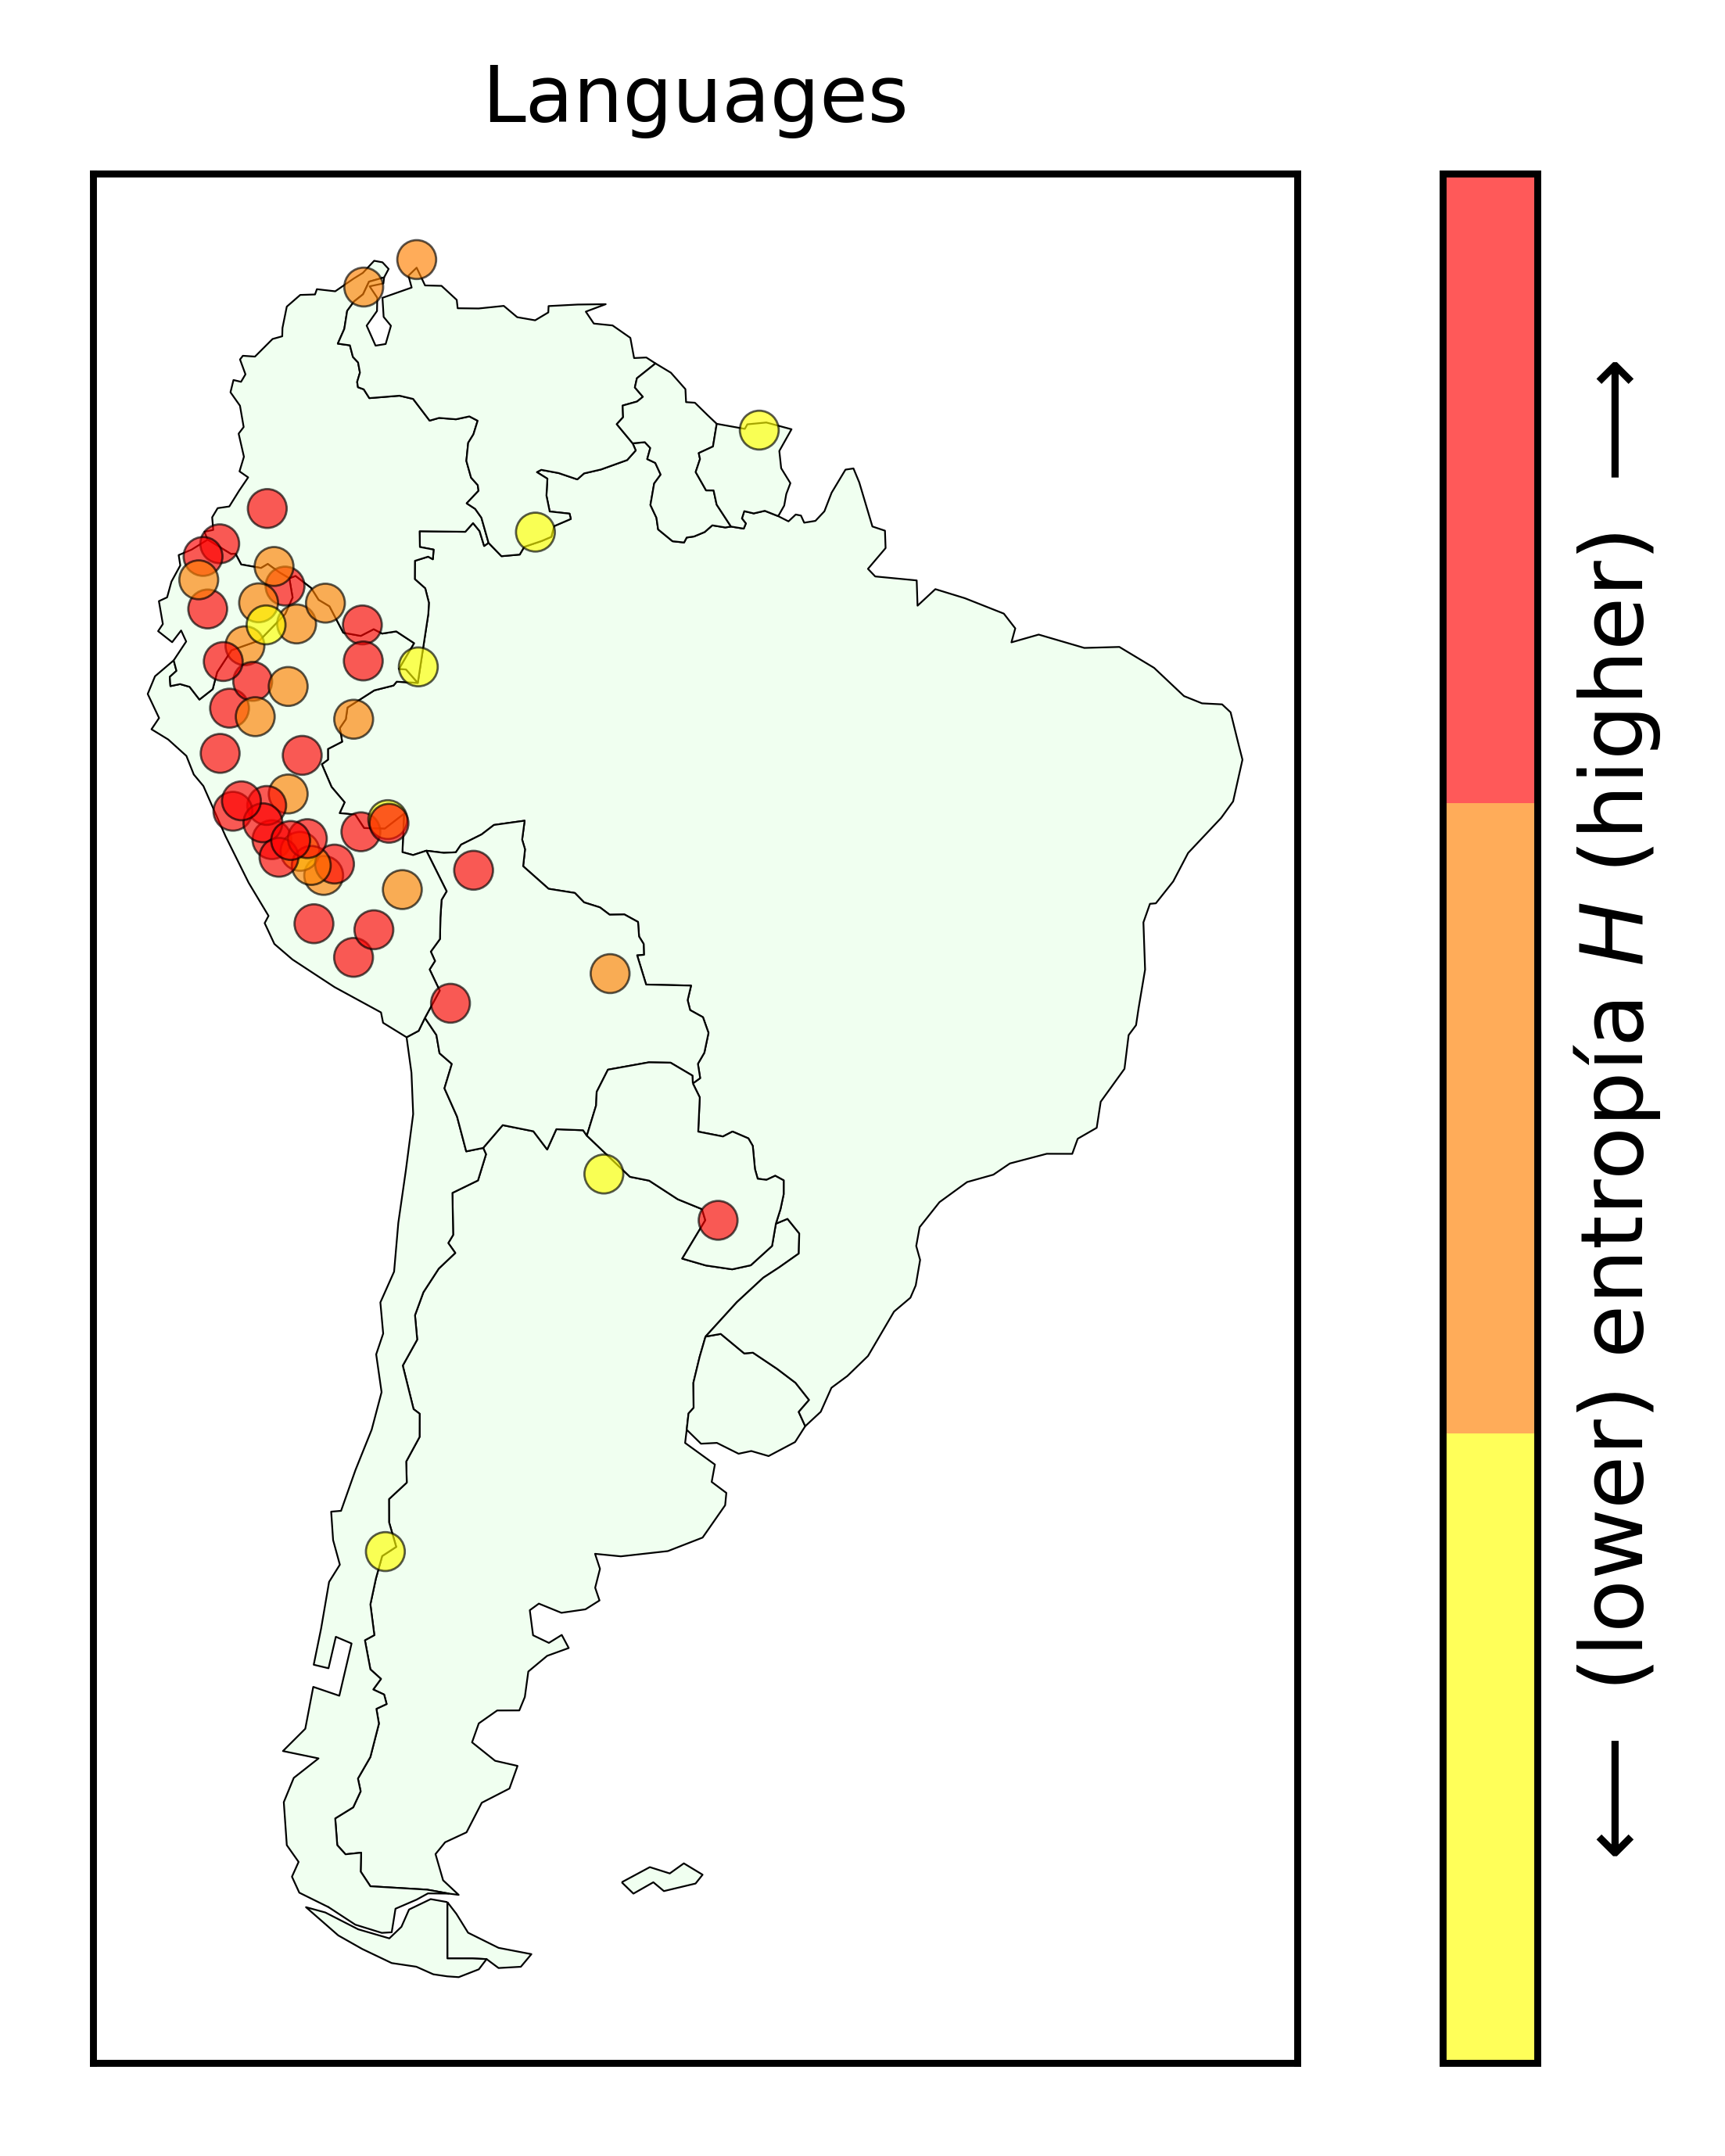

In [106]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('Languages',fontsize=9)
world.plot(ax=ax, color='honeydew', edgecolor='k',linewidth=0.2)
#cities.plot(ax=ax, marker='o', color='red', markersize=5)
#cmap = plt.cm.get_cmap('autumn',3)
plt.scatter(X,Y, c=c, s=20, edgecolors='k',linewidths=0.25, cmap=plt.cm.get_cmap('autumn',3).reversed(),alpha=0.65)
plt.colorbar(ticks=range(3), label=r'$\longleftarrow$ (lower) entropía $H$ (higher) $\longrightarrow$')
#cbar.set_label(size=15)
#ticklabels = [round(min(c),2),round((min(c)+max(c))/2,2),round(max(c),2)]
#cbar.set_ticks(np.linspace(min(c),max(c), len(ticklabels)))
#cbar.set_ticklabels(ticklabels)
#cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
plt.clim(min(c),max(c))
#ax.plot(X, Y, marker='o',color='gold',linewidth=0,markersize=5,alpha=0.75)
#for i in range(len(x)):
#    ax.annotate(codes[i], weight='demi', color='k', xy=(x[i],y[i]), fontsize=3, alpha=0.5)
    
#texts = [plt.text(x[i], y[i], codes[i], ha='center', va='center',color='k',fontsize=2.75,weight='demi') for i in range(len(x))]
#adjust_text(texts,expand_text=(1.0075, 1.0075))
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('map_iso.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()